# Part of my datascience learning journey with Datacamp

In this excercise I have learn about data manipulation with pandas using datasets provided by datacamp

# DataFrames

## Introducing DataFrames

### Inspecting DataFrames

    .head() returns the first few rows (the “head” of the DataFrame).
    .info() shows information on each of the columns, such as the data type and number of missing values.
    .shape returns the number of rows and columns of the DataFrame.
    .describe() calculates a few summary statistics for each column.


In [5]:
import pandas as pd
homelessness=pd.read_csv("homelessness.csv")

In [6]:
# Print the head of the homelessness data
print(homelessness.head())

# Print information about homelessness
print(homelessness.info())

# Print the shape of homelessness
print(homelessness.shape)

# Print a description of homelessness
print(homelessness.describe())

   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop  
0    4887681  
1     735139  
2    7158024  
3    3009733  
4   39461588  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      51 non-null     int64  
 1   region          51 non-null     object 
 2   state           51 non-null     object 
 3   individuals     51 non-null     float64
 4   family_members  51 non-null     float64
 5   state_pop       51 

### Parts of a DataFrame

    .values: A two-dimensional NumPy array of values.
    .columns: An index of columns: the column names.
    .index: An index for the rows: either row numbers or row names.


In [7]:

# Print a 2D NumPy array of the values in homelessness.
print(homelessness.values)

# Print the column names of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)

[[0 'East South Central' 'Alabama' 2570.0 864.0 4887681]
 [1 'Pacific' 'Alaska' 1434.0 582.0 735139]
 [2 'Mountain' 'Arizona' 7259.0 2606.0 7158024]
 [3 'West South Central' 'Arkansas' 2280.0 432.0 3009733]
 [4 'Pacific' 'California' 109008.0 20964.0 39461588]
 [5 'Mountain' 'Colorado' 7607.0 3250.0 5691287]
 [6 'New England' 'Connecticut' 2280.0 1696.0 3571520]
 [7 'South Atlantic' 'Delaware' 708.0 374.0 965479]
 [8 'South Atlantic' 'District of Columbia' 3770.0 3134.0 701547]
 [9 'South Atlantic' 'Florida' 21443.0 9587.0 21244317]
 [10 'South Atlantic' 'Georgia' 6943.0 2556.0 10511131]
 [11 'Pacific' 'Hawaii' 4131.0 2399.0 1420593]
 [12 'Mountain' 'Idaho' 1297.0 715.0 1750536]
 [13 'East North Central' 'Illinois' 6752.0 3891.0 12723071]
 [14 'East North Central' 'Indiana' 3776.0 1482.0 6695497]
 [15 'West North Central' 'Iowa' 1711.0 1038.0 3148618]
 [16 'West North Central' 'Kansas' 1443.0 773.0 2911359]
 [17 'East South Central' 'Kentucky' 2735.0 953.0 4461153]
 [18 'West South Cen

## Sorting and subsetting
### Sorting rows

In [10]:
# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals')

# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members',ascending=False)

# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region','family_members'], ascending = [True, False])


### Subsetting columns

In [12]:
# Select the individuals column
individuals = homelessness['individuals']

# Select the state and family_members columns
state_fam = homelessness[['state','family_members']]

# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals','state']]

### Subsetting rows

In [13]:
# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals']>10000]

# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region']=="Mountain"]

# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members']<1000) & (homelessness['region']=="Pacific")]


### Subsetting rows by categorical variables

|, .isin()

In [14]:
# Subset for rows in South Atlantic or Mid-Atlantic regions
south_mid_atlantic = homelessness[(homelessness['region']=="South Atlantic") | (homelessness['region']=="Mid-Atlantic")]

# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness['state'].isin(canu)]


### New columns

In [15]:
# Add total col as sum of individuals and family_members
homelessness['total'] = homelessness['individuals'] + homelessness['family_members']

# Add p_individuals col as proportion of individuals
homelessness['p_individuals'] = homelessness['individuals'] / homelessness['total']

# See the result
print(homelessness)

    Unnamed: 0              region                 state  individuals  \
0            0  East South Central               Alabama       2570.0   
1            1             Pacific                Alaska       1434.0   
2            2            Mountain               Arizona       7259.0   
3            3  West South Central              Arkansas       2280.0   
4            4             Pacific            California     109008.0   
5            5            Mountain              Colorado       7607.0   
6            6         New England           Connecticut       2280.0   
7            7      South Atlantic              Delaware        708.0   
8            8      South Atlantic  District of Columbia       3770.0   
9            9      South Atlantic               Florida      21443.0   
10          10      South Atlantic               Georgia       6943.0   
11          11             Pacific                Hawaii       4131.0   
12          12            Mountain                 

### Combo-attack!

In [16]:
# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"]

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness['indiv_per_10k']>20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values('indiv_per_10k', ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[['state','indiv_per_10k']]

# See the result
print(result)

                   state  indiv_per_10k
8   District of Columbia      53.738381
11                Hawaii      29.079406
4             California      27.623825
37                Oregon      26.636307
28                Nevada      23.314189
47            Washington      21.829195
32              New York      20.392363


# Aggregating Data

## Summary Statistics

### Mean & median

In [18]:
sales=pd.read_csv("sales_subset.csv")

In [19]:
# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales['weekly_sales'].mean())

# Print the median of weekly_sales
print(sales['weekly_sales'].median())

   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------

### Summarizing dates

In [21]:
# Print the maximum of the date column
print(sales['date'].max()) 

# Print the minimum of the date column
print(sales['date'].min())

2012-10-26
2010-02-05


### Efficient summaries

Using .agg() function to apply custom routines / function to DataFrame

In [25]:
# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales['temperature_c'].agg(iqr))

16.583333333333336


In [26]:
# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", 'fuel_price_usd_per_l', 'unemployment']].agg(iqr))

temperature_c           16.583333
fuel_price_usd_per_l     0.073176
unemployment             0.565000
dtype: float64


In [28]:
import numpy as np
# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))

        temperature_c  fuel_price_usd_per_l  unemployment
iqr         16.583333              0.073176         0.565
median      16.966667              0.743381         8.099


### Cumulative Statistics

using .cummax() .cummin()  .cumprod()  .cumsum()

In [30]:
sales_1_1=pd.read_csv("sales_subset.csv")
# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date', ascending=True)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])

             date  weekly_sales  cum_weekly_sales  cum_max_sales
0      2010-02-05      24924.50      2.492450e+04       24924.50
6437   2010-02-05      38597.52      6.352202e+04       38597.52
1249   2010-02-05       3840.21      6.736223e+04       38597.52
6449   2010-02-05      17590.59      8.495282e+04       38597.52
6461   2010-02-05       4929.87      8.988269e+04       38597.52
...           ...           ...               ...            ...
3592   2012-10-05        440.00      2.568932e+08      293966.05
8108   2012-10-05        660.00      2.568938e+08      293966.05
10773  2012-10-05        915.00      2.568947e+08      293966.05
6257   2012-10-12          3.00      2.568947e+08      293966.05
3384   2012-10-26        -21.63      2.568947e+08      293966.05

[10774 rows x 4 columns]


## Counting

### Dropping Duplicates

In [33]:
sales

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...,...
10769,10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


In [32]:
# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store','type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=['store','department'])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales["is_holiday"]==True].drop_duplicates('date')

# Print date col of holiday_dates
print(holiday_dates['date'])

      Unnamed: 0  store type  department        date  weekly_sales  \
0              0      1    A           1  2010-02-05      24924.50   
901          901      2    A           1  2010-02-05      35034.06   
1798        1798      4    A           1  2010-02-05      38724.42   
2699        2699      6    A           1  2010-02-05      25619.00   
3593        3593     10    B           1  2010-02-05      40212.84   

      is_holiday  temperature_c  fuel_price_usd_per_l  unemployment  
0          False       5.727778              0.679451         8.106  
901        False       4.550000              0.679451         8.324  
1798       False       6.533333              0.686319         8.623  
2699       False       4.683333              0.679451         7.259  
3593       False      12.411111              0.782478         9.765  
    Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0            0      1    A           1  2010-02-05      24924.50       False   

### Counting categorical variables

In [35]:
# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

A    11
B     1
Name: type, dtype: int64
A    0.916667
B    0.083333
Name: type, dtype: float64
1     12
55    12
72    12
71    12
67    12
      ..
37    10
48     8
50     6
39     4
43     2
Name: department, Length: 80, dtype: int64
1     0.012917
55    0.012917
72    0.012917
71    0.012917
67    0.012917
        ...   
37    0.010764
48    0.008611
50    0.006459
39    0.004306
43    0.002153
Name: department, Length: 80, dtype: float64


## Grouped summary statistics

without using .groupby()

In [39]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()
print(sales_all)

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()
print(sales_A)

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)


256894718.89999998
233716315.01
[0.9097747 0.0902253 0.       ]


Using .groupby()

In [41]:
# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales.weekly_sales)
print(sales_propn_by_type)

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type','is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)

type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64


### Multiple grouped summaries

In [44]:
# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min,np.max,np.mean,np.median])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment','fuel_price_usd_per_l']].agg([np.min,np.max,np.mean,np.median])

# Print unemp_fuel_stats
print(unemp_fuel_stats)

        amin       amax          mean    median
type                                           
A    -1098.0  293966.05  23674.667242  11943.92
B     -798.0  232558.51  25696.678370  13336.08
     unemployment                         fuel_price_usd_per_l            \
             amin   amax      mean median                 amin      amax   
type                                                                       
A           3.879  8.992  7.972611  8.067             0.664129  1.107410   
B           7.170  9.765  9.279323  9.199             0.760023  1.107674   

                          
          mean    median  
type                      
A     0.744619  0.735455  
B     0.805858  0.803348  


## Pivot tables

Below we can use .pivot_table() as an alternative to .groupby()

In [47]:
# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values='weekly_sales',index='type')

# Print mean_sales_by_type
print(mean_sales_by_type)

      weekly_sales
type              
A     23674.667242
B     25696.678370


In [48]:
# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values='weekly_sales',index='type',aggfunc=[np.mean,np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)

              mean       median
      weekly_sales weekly_sales
type                           
A     23674.667242     11943.92
B     25696.678370     13336.08


In [49]:
# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values='weekly_sales',index='type',columns='is_holiday')

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)

is_holiday         False      True 
type                               
A           23768.583523  590.04525
B           25751.980533  810.70500


### Fill in missing values & sum values with pivot tables


-fill_value replaces missing values with a real value (known as imputation).

-margins is a shortcut for when you pivoted by two variables, but also wanted to pivot by each of those variables separately: it gives the row and column totals of the pivot table contents.


In [51]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales',index='department',columns='type'))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659            NaN

[80 rows x 2 columns]


In [50]:
# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values='weekly_sales',index='department',columns='type',fill_value=0))

type                    A              B
department                              
1            30961.725379   44050.626667
2            67600.158788  112958.526667
3            17160.002955   30580.655000
4            44285.399091   51219.654167
5            34821.011364   63236.875000
...                   ...            ...
95          123933.787121   77082.102500
96           21367.042857    9528.538333
97           28471.266970    5828.873333
98           12875.423182     217.428333
99             379.123659       0.000000

[80 rows x 2 columns]


In [52]:
# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0,margins=True))

type                   A              B           All
department                                           
1           30961.725379   44050.626667  32052.467153
2           67600.158788  112958.526667  71380.022778
3           17160.002955   30580.655000  18278.390625
4           44285.399091   51219.654167  44863.253681
5           34821.011364   63236.875000  37189.000000
...                  ...            ...           ...
96          21367.042857    9528.538333  20337.607681
97          28471.266970    5828.873333  26584.400833
98          12875.423182     217.428333  11820.590278
99            379.123659       0.000000    379.123659
All         23674.667242   25696.678370  23843.950149

[81 rows x 3 columns]


## Slicing and indexing

.set_index() .reset_index()

### Explicit indexes

setting and removing indexes

In [82]:
temperatures=pd.read_csv("temperatures.csv")

In [83]:
# Look at temperatures
print(temperatures)

       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
...           ...         ...      ...            ...         ...
16495       16495  2013-05-01     Xian          China      18.979
16496       16496  2013-06-01     Xian          China      23.522
16497       16497  2013-07-01     Xian          China      25.251
16498       16498  2013-08-01     Xian          China      24.528
16499       16499  2013-09-01     Xian          China         NaN

[16500 rows x 5 columns]


In [55]:
# Index temperatures by city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind)

         Unnamed: 0        date        country  avg_temp_c
city                                                      
Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
...             ...         ...            ...         ...
Xian          16495  2013-05-01          China      18.979
Xian          16496  2013-06-01          China      23.522
Xian          16497  2013-07-01          China      25.251
Xian          16498  2013-08-01          China      24.528
Xian          16499  2013-09-01          China         NaN

[16500 rows x 4 columns]


In [58]:
# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))

          city  Unnamed: 0        date        country  avg_temp_c
0      Abidjan           0  2000-01-01  Côte D'Ivoire      27.293
1      Abidjan           1  2000-02-01  Côte D'Ivoire      27.685
2      Abidjan           2  2000-03-01  Côte D'Ivoire      29.061
3      Abidjan           3  2000-04-01  Côte D'Ivoire      28.162
4      Abidjan           4  2000-05-01  Côte D'Ivoire      27.547
...        ...         ...         ...            ...         ...
16495     Xian       16495  2013-05-01          China      18.979
16496     Xian       16496  2013-06-01          China      23.522
16497     Xian       16497  2013-07-01          China      25.251
16498     Xian       16498  2013-08-01          China      24.528
16499     Xian       16499  2013-09-01          China         NaN

[16500 rows x 5 columns]
       Unnamed: 0        date        country  avg_temp_c
0               0  2000-01-01  Côte D'Ivoire      27.293
1               1  2000-02-01  Côte D'Ivoire      27.685
2          

### slicing and subsetting with .loc & .iloc

In [59]:
# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures['city'].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])

       Unnamed: 0        date              city country  avg_temp_c
10725       10725  2000-01-01            Moscow  Russia      -7.313
10726       10726  2000-02-01            Moscow  Russia      -3.551
10727       10727  2000-03-01            Moscow  Russia      -1.661
10728       10728  2000-04-01            Moscow  Russia      10.096
10729       10729  2000-05-01            Moscow  Russia      10.357
...           ...         ...               ...     ...         ...
13360       13360  2013-05-01  Saint Petersburg  Russia      12.355
13361       13361  2013-06-01  Saint Petersburg  Russia      17.185
13362       13362  2013-07-01  Saint Petersburg  Russia      17.234
13363       13363  2013-08-01  Saint Petersburg  Russia      17.153
13364       13364  2013-09-01  Saint Petersburg  Russia         NaN

[330 rows x 5 columns]
                  Unnamed: 0        date country  avg_temp_c
city                                                        
Moscow                 10725  2000-01-

### Setting multi-level indexes

In [60]:
# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country','city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"),("Pakistan","Lahore")]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])

                         Unnamed: 0        date  avg_temp_c
country  city                                              
Brazil   Rio De Janeiro       12540  2000-01-01      25.974
         Rio De Janeiro       12541  2000-02-01      26.699
         Rio De Janeiro       12542  2000-03-01      26.270
         Rio De Janeiro       12543  2000-04-01      25.750
         Rio De Janeiro       12544  2000-05-01      24.356
...                             ...         ...         ...
Pakistan Lahore                8575  2013-05-01      33.457
         Lahore                8576  2013-06-01      34.456
         Lahore                8577  2013-07-01      33.279
         Lahore                8578  2013-08-01      31.511
         Lahore                8579  2013-09-01         NaN

[330 rows x 3 columns]


### sorting by index values

In [61]:
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level='city'))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=['country','city'],ascending=[True,False]))

                    Unnamed: 0        date  avg_temp_c
country     city                                      
Afghanistan Kabul         7260  2000-01-01       3.326
            Kabul         7261  2000-02-01       3.454
            Kabul         7262  2000-03-01       9.612
            Kabul         7263  2000-04-01      17.925
            Kabul         7264  2000-05-01      24.658
...                        ...         ...         ...
Zimbabwe    Harare        5605  2013-05-01      18.298
            Harare        5606  2013-06-01      17.020
            Harare        5607  2013-07-01      16.299
            Harare        5608  2013-08-01      19.232
            Harare        5609  2013-09-01         NaN

[16500 rows x 3 columns]
                       Unnamed: 0        date  avg_temp_c
country       city                                       
Côte D'Ivoire Abidjan           0  2000-01-01      27.293
              Abidjan           1  2000-02-01      27.685
              Abidjan      

### Sorting by index values

Compared to slicing lists, there are a few things to remember.

    You can only slice an index if the index is sorted (using .sort_index()).
    - To slice at the outer level, first and last can be strings.
    - To slice at inner levels, first and last should be tuples.
    - If you pass a single slice to .loc[], it will slice the rows.


In [62]:
# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc['Pakistan':'Russia'])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc['Lahore':'Moscow'])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[('Pakistan','Lahore'):('Russia','Moscow')])

                           Unnamed: 0        date  avg_temp_c
country  city                                                
Pakistan Faisalabad              4785  2000-01-01      12.792
         Faisalabad              4786  2000-02-01      14.339
         Faisalabad              4787  2000-03-01      20.309
         Faisalabad              4788  2000-04-01      29.072
         Faisalabad              4789  2000-05-01      34.845
...                               ...         ...         ...
Russia   Saint Petersburg       13360  2013-05-01      12.355
         Saint Petersburg       13361  2013-06-01      17.185
         Saint Petersburg       13362  2013-07-01      17.234
         Saint Petersburg       13363  2013-08-01      17.153
         Saint Petersburg       13364  2013-09-01         NaN

[1155 rows x 3 columns]
                    Unnamed: 0        date  avg_temp_c
country city                                          
Mexico  Mexico           10230  2000-01-01      12.694
    

### slicing in both directions

In [64]:
# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:,'date':'avg_temp_c'])

# Subset in both directions at once
print(temperatures_srt.loc[('India','Hyderabad'):('Ira1','Baghdad'),'date':'avg_temp_c'])

                   Unnamed: 0        date  avg_temp_c
country city                                         
India   Hyderabad        5940  2000-01-01      23.779
        Hyderabad        5941  2000-02-01      25.826
        Hyderabad        5942  2000-03-01      28.821
        Hyderabad        5943  2000-04-01      32.698
        Hyderabad        5944  2000-05-01      32.438
...                       ...         ...         ...
Iraq    Baghdad          1150  2013-05-01      28.673
        Baghdad          1151  2013-06-01      33.803
        Baghdad          1152  2013-07-01      36.392
        Baghdad          1153  2013-08-01      35.463
        Baghdad          1154  2013-09-01         NaN

[2145 rows x 3 columns]
                          date  avg_temp_c
country     city                          
Afghanistan Kabul   2000-01-01       3.326
            Kabul   2000-02-01       3.454
            Kabul   2000-03-01       9.612
            Kabul   2000-04-01      17.925
            Kab

### Slicing time series

In [66]:
# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= '2010-01-01') & (temperatures["date"] <= '2011-12-31')]
print(temperatures_bool)

# Set date as the index and sort the index
temperatures_ind = temperatures.set_index('date').sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc['2010':'2011'])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc['2010-08':'2011-2'])

       Unnamed: 0        date     city        country  avg_temp_c
120           120  2010-01-01  Abidjan  Côte D'Ivoire      28.270
121           121  2010-02-01  Abidjan  Côte D'Ivoire      29.262
122           122  2010-03-01  Abidjan  Côte D'Ivoire      29.596
123           123  2010-04-01  Abidjan  Côte D'Ivoire      29.068
124           124  2010-05-01  Abidjan  Côte D'Ivoire      28.258
...           ...         ...      ...            ...         ...
16474       16474  2011-08-01     Xian          China      23.069
16475       16475  2011-09-01     Xian          China      16.775
16476       16476  2011-10-01     Xian          China      12.587
16477       16477  2011-11-01     Xian          China       7.543
16478       16478  2011-12-01     Xian          China      -0.490

[2400 rows x 5 columns]
            Unnamed: 0        city    country  avg_temp_c
date                                                     
2010-01-01        4905  Faisalabad   Pakistan      11.810
2010-01-0

### Subsetting by row/column number

This is done using .iloc[], and like .loc[], it can take two arguments to let you subset by rows and columns.

In [67]:
# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22,1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5,:])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[0:5,2:4])

2001-11-01
   Unnamed: 0        date     city        country  avg_temp_c
0           0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1           1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2           2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3           3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4           4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
          city        country
0      Abidjan  Côte D'Ivoire
1      Abidjan  Côte D'Ivoire
2      Abidjan  Côte D'Ivoire
3      Abidjan  Côte D'Ivoire
4      Abidjan  Côte D'Ivoire
...        ...            ...
16495     Xian          China
16496     Xian          China
16497     Xian          China
16498     Xian          China
16499     Xian          China

[16500 rows x 2 columns]
      city        country
0  Abidjan  Côte D'Ivoire
1  Abidjan  Côte D'Ivoire
2  Abidjan  Côte D'Ivoire
3  Abidjan  Côte D'Ivoire
4  Abidjan  Côte D'Ivoire


## Working with pivot tables

### Pivot temperature by city and year

In [81]:
temperatures

,Unnamed: 0,date,city,country,avg_temp_c,year
0,0,NaT,Abidjan,Côte D'Ivoire,27.293,NaN
1,1,NaT,Abidjan,Côte D'Ivoire,27.685,NaN
2,2,NaT,Abidjan,Côte D'Ivoire,29.061,NaN
3,3,NaT,Abidjan,Côte D'Ivoire,28.162,NaN
4,4,NaT,Abidjan,Côte D'Ivoire,27.547,NaN
...,...,...,...,...,...,...
16495,16495,NaT,Xian,China,18.979,NaN
16496,16496,NaT,Xian,China,23.522,NaN
16497,16497,NaT,Xian,China,25.251,NaN
16498,16498,NaT,Xian,China,24.528,NaN


In [78]:
#temperatures['date']=pd.to_datetime(temperatures['date'], utc=True)
#temperatures['date'] = temperatures['date'].dt.strftime('%m/%d')

In [ ]:
# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table('avg_temp_c', index=['country','city'], columns='year')

# See the result
print(temp_by_country_city_vs_year)

### Subsetting pivot tables

In [ ]:
# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')]

# Subset in both directions at once
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'),'2005':'2010']

### Calculating on a pivot table

In [ ]:
# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year==mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis='columns')

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city==mean_temp_by_city.min()])

# Creating and visualizing DataFrames

## Visualizing your data

### Avocado size popularity

In [84]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

avocados=pd.read_pickle("avoplotto.pkl")

# Look at the first few rows of data
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


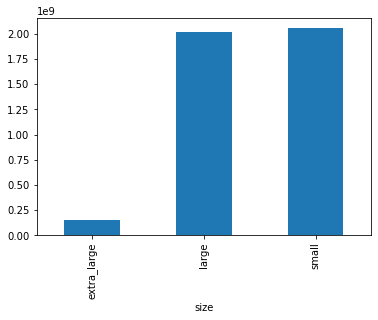

In [85]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby('size')['nb_sold'].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind='bar')

# Show the plot
plt.show()

### Changes in sales over time

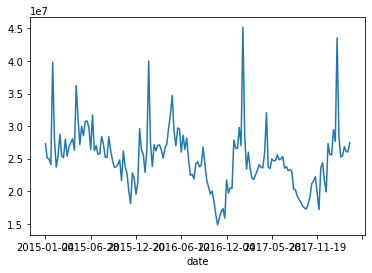

In [86]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind='line')

# Show the plot
plt.show()

### Avocado supply and demand

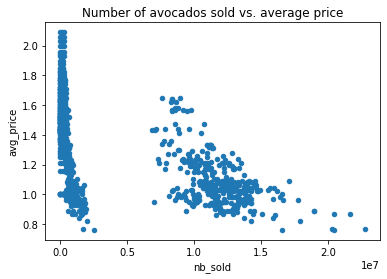

In [87]:
# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x='nb_sold',y='avg_price',kind='scatter',title='Number of avocados sold vs. average price')

# Show the plot
plt.show()

### Price of conventional vs. organic avocados

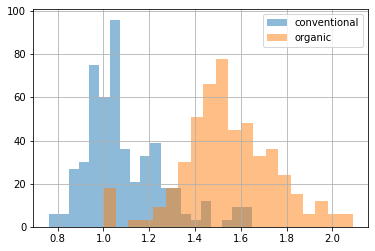

In [91]:
# Histogram of conventional avg_price 
avocados[avocados['type']=='conventional']['avg_price'].hist(bins=20, alpha=0.5)

# Histogram of organic avg_price
avocados[avocados['type']=='organic']['avg_price'].hist(bins=20, alpha=0.5)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

## Missing values

.isna()  .any()

In [92]:
avocados_2016=pd.read_pickle("avoplotto.pkl")

In [93]:
# Check individual values for missing values
print(avocados_2016.isna())

       date   type   year  avg_price   size  nb_sold
0     False  False  False      False  False    False
1     False  False  False      False  False    False
2     False  False  False      False  False    False
3     False  False  False      False  False    False
4     False  False  False      False  False    False
...     ...    ...    ...        ...    ...      ...
1009  False  False  False      False  False    False
1010  False  False  False      False  False    False
1011  False  False  False      False  False    False
1012  False  False  False      False  False    False
1013  False  False  False      False  False    False

[1014 rows x 6 columns]


In [94]:
# Check each column for missing values
print(avocados_2016.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


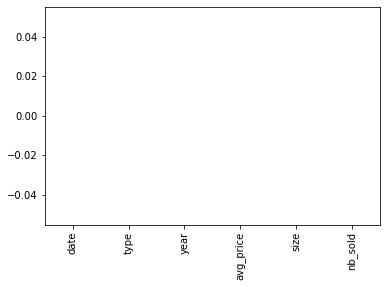

In [95]:
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')

# Show plot
plt.show()

### Removing missing values

In [96]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool


### Replacing missing values

In [ ]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados_2016[cols_with_missing].hist()

# Show the plot
plt.show()

In [ ]:
# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)

# Create histograms of the filled columns
avocados_filled[cols_with_missing].hist()

# Show the plot
plt.show()

## Creating DataFrames

### List of dictionaries

In [98]:
# Create a list of dictionaries with new data
avocados_list = [
    {'date': "2019-11-03", 'small_sold': 10376832, 'large_sold': 7835071},
    {'date': "2019-11-10", 'small_sold': 10717154, 'large_sold': 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


### Dictionary of lists

In [100]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


## Reading and writing CSVs

### CSV to DataFrame

In [ ]:
# Read CSV as DataFrame called airline_bumping
airline_bumping = pd.read_csv("airline_bumping.csv")

# Take a look at the DataFrame
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000

# Print airline_totals
print(airline_totals)

### DataFrame to CSV

In [ ]:
# Create airline_totals_sorted
airline_totals_sorted = airline_totals.sort_values('bumps_per_10k', ascending=False)

# Print airline_totals_sorted
print(airline_totals_sorted)

# Save as airline_totals_sorted.csv
airline_totals_sorted.to_csv("airline_totals_sorted.csv")